1. Write your own Python implementation of the cross-validation procedure (please do not use existing implementation). Feel free to shuffle the data so that the splits are different each time it is run.

2. Perform cross-validation on the pasture dataset using multiple linear regression (feel free to use sci-kit learn). 
    - In other words, train a multiple linear regression learner on the training part and evaluate it using the test part (compute RMSE, feel free to write your own implementation or use sci-kit learn). 
    - Repeat this step as the cross-validation iterations progress (make sure the number of splits is specified by the user).

3. Report the mean and standard deviation of the RMSE values.

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm



In [2]:
data = pd.read_csv('data/pasture-data.csv')

data

,I,X1,X2,X3,Y
0,1,15.50,17.25,0.24,18.38
1,2,22.29,18.51,0.20,20.00
2,3,12.36,11.13,0.12,11.50
3,4,31.84,5.54,0.12,25.00
4,5,83.90,5.44,0.04,62.50
...,...,...,...,...,...
62,63,17.17,24.16,0.36,22.50
63,64,82.00,7.89,0.03,90.00
64,65,40.60,3.27,0.02,28.00
65,66,53.89,53.16,0.24,50.00


In [3]:


# get x data .. only features, no index and outcome variables
X = data.iloc[:,1:-1]
# this is the outcome variable
y = data.iloc[:,-1]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Compute residuals
residuals = (y_test - y_pred)

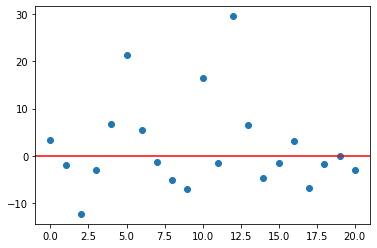

In [4]:
# Plot residuals
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [79]:
# get x and y data .. only features, no index and outcome variables
X,y = data.iloc[:,1:-1], data.iloc[:,-1]


X.shape, y.shape

# X.head(), y.head()
# data.info()

((67, 3), (67,))

In [30]:
lab_enc = LabelEncoder()
y_enc = lab_enc.fit_transform(y)
model = LinearRegression()

train_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print('RMSE MEAN: ', train_scores.mean()*-1, '\nRMSE STD: ', train_scores.std())


# train_scores_enc = cross_val_score(model, X, y_enc, scoring='neg_root_mean_squared_error', cv=4)
# print('\nENCODED RMSE MEAN: ', train_scores_enc.mean()*-1, '\n RMSE STD: ', train_scores_enc.std())

RMSE MEAN:  8.52115645364364 
RMSE STD:  2.496670945886161


## Remove a Column
Remove X3 and find that RMSE actually decreases

In [22]:
X,y = data.iloc[:,1:-2], data.iloc[:,-1]

X.shape, y.shape


((67, 2), (67,))

In [29]:
lab_enc = LabelEncoder()
y_enc = lab_enc.fit_transform(y)
model = LinearRegression()

train_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=4)
print('RMSE MEAN: ', train_scores.mean()*-1, '\nRMSE STD: ', train_scores.std())


RMSE MEAN:  8.765252252819968 
RMSE STD:  1.3955762387817936
